In [1]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [3]:
df=pd.read_excel('C:/Users/Suraj Gupta/Downloads/perrinchampagne.xlsx')
df

,Perrin Freres monthly champagne sales millions ’64-’72,Unnamed: 1,Unnamed: 2
0,Exported from datamarket.com,NaN,NaN
1,Date exported,2013-10-01 12:05:00,NaN
2,On DataMarket,http://datamarket.com/data/set/22r5/perrin-fre...,NaN
3,License,Unknown; please assume a restricted license (a...,NaN
4,Provider,Time Series Data Library,NaN
...,...,...,...
111,1972-05-01 00:00:00,4618,NaN
112,1972-06-01 00:00:00,5312,NaN
113,1972-07-01 00:00:00,4298,NaN
114,1972-08-01 00:00:00,1413,NaN


In [4]:
df.drop(df.index[range(0,11)],axis=0,inplace=True)

In [5]:
df

,Perrin Freres monthly champagne sales millions ’64-’72,Unnamed: 1,Unnamed: 2
11,1964-01-01 00:00:00,2815,NaN
12,1964-02-01 00:00:00,2672,NaN
13,1964-03-01 00:00:00,2755,NaN
14,1964-04-01 00:00:00,2721,NaN
15,1964-05-01 00:00:00,2946,NaN
...,...,...,...
111,1972-05-01 00:00:00,4618,NaN
112,1972-06-01 00:00:00,5312,NaN
113,1972-07-01 00:00:00,4298,NaN
114,1972-08-01 00:00:00,1413,NaN


In [6]:
df.rename(columns={'Perrin Freres monthly champagne sales millions ’64-’72': 'Month', 'Unnamed: 1': 'Perrin Freres monthly champagne sales millions ’64-’72'}, inplace=True)

In [7]:
df

,Month,Perrin Freres monthly champagne sales millions ’64-’72,Unnamed: 2
11,1964-01-01 00:00:00,2815,NaN
12,1964-02-01 00:00:00,2672,NaN
13,1964-03-01 00:00:00,2755,NaN
14,1964-04-01 00:00:00,2721,NaN
15,1964-05-01 00:00:00,2946,NaN
...,...,...,...
111,1972-05-01 00:00:00,4618,NaN
112,1972-06-01 00:00:00,5312,NaN
113,1972-07-01 00:00:00,4298,NaN
114,1972-08-01 00:00:00,1413,NaN


In [8]:
df.drop(['Unnamed: 2'], axis = 1,inplace=True)
df.head()

,Month,Perrin Freres monthly champagne sales millions ’64-’72
11,1964-01-01 00:00:00,2815
12,1964-02-01 00:00:00,2672
13,1964-03-01 00:00:00,2755
14,1964-04-01 00:00:00,2721
15,1964-05-01 00:00:00,2946


In [11]:
df.isnull().sum()

Month                                                     0
Perrin Freres monthly champagne sales millions ’64-’72    0
dtype: int64

In [12]:
df.dtypes

Month                                                     object
Perrin Freres monthly champagne sales millions ’64-’72    object
dtype: object

In [13]:
df['Month'] = pd.to_datetime(df['Month'])
df['Perrin Freres monthly champagne sales millions ’64-’72'] = df['Perrin Freres monthly champagne sales millions ’64-’72'].astype(float)

In [14]:
df.dtypes

Month                                                     datetime64[ns]
Perrin Freres monthly champagne sales millions ’64-’72           float64
dtype: object

In [15]:
df.set_index('Month',inplace=True)
df

,Perrin Freres monthly champagne sales millions ’64-’72
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0
...,...
1972-05-01,4618.0
1972-06-01,5312.0
1972-07-01,4298.0


In [16]:
df.describe()

,Perrin Freres monthly champagne sales millions ’64-’72
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


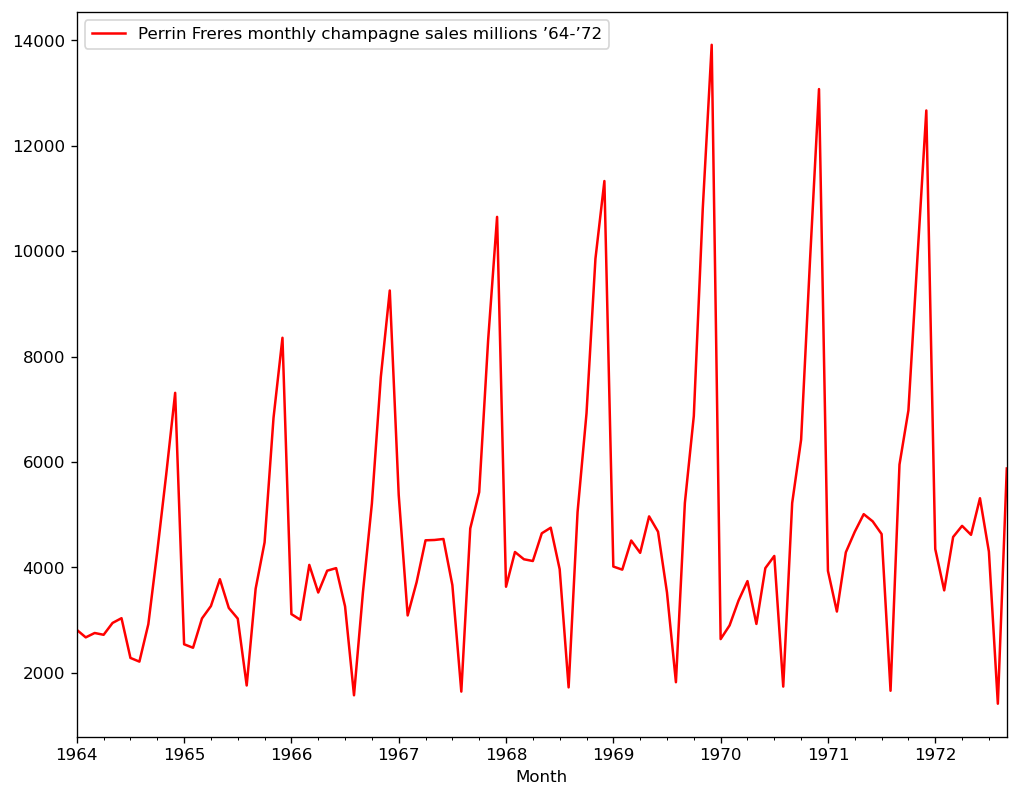

In [18]:
df.plot(figsize=(10, 8),c='red')
plt.show()

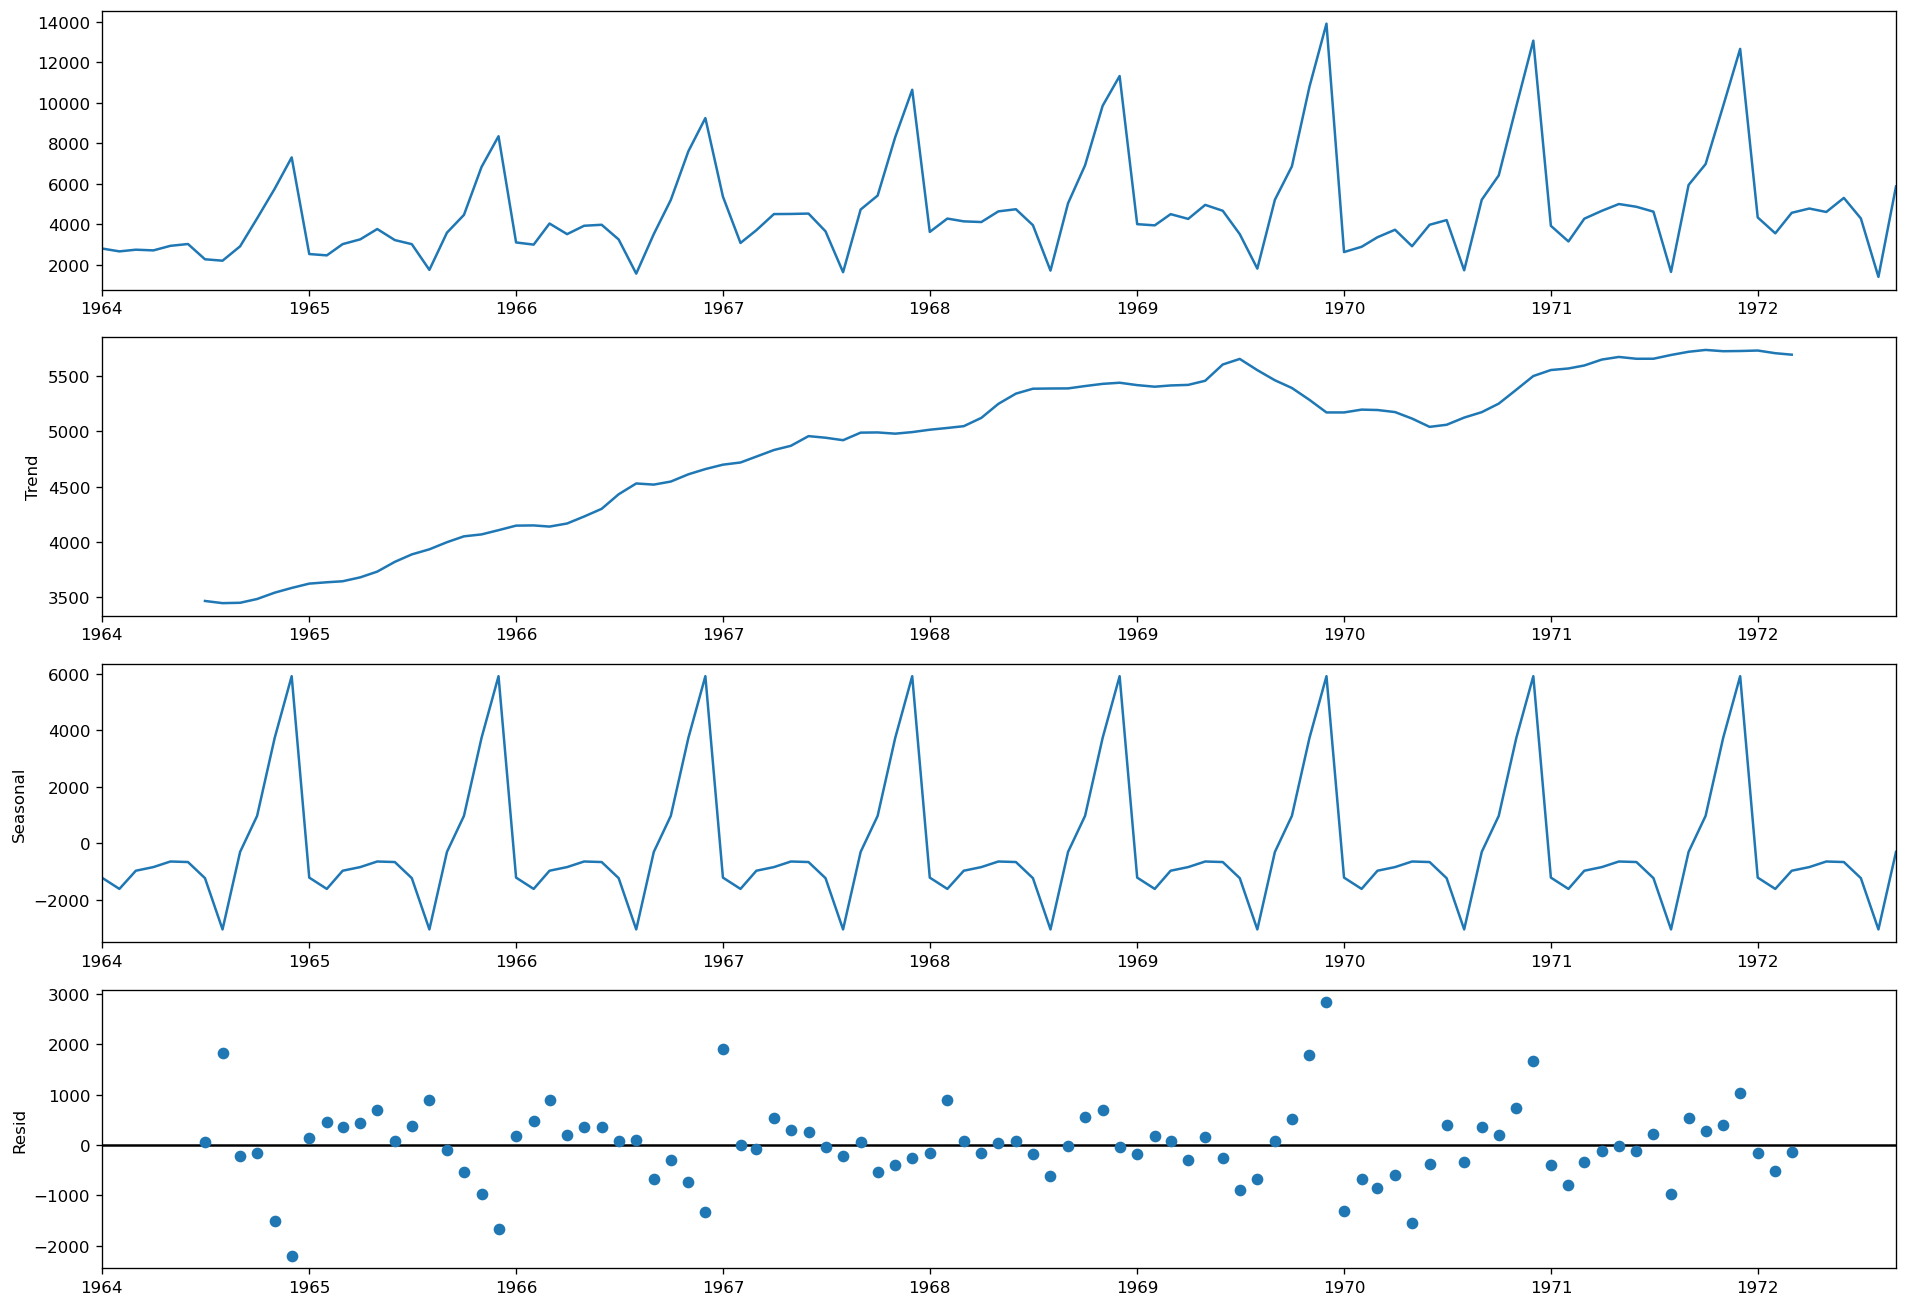

In [20]:
#Decomposing Time series into 3 distinct components - Trend , Seasonality and Noise

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 16, 11
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()


In [21]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Perrin Freres monthly champagne sales millions ’64-’72'])

In [22]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels=['ADF Test Statistic','p-value','Lags used','Number of Observation used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1] <= 0.05:
        print('Data is stationary and Reject Null Hypothesis')
    else:
        print('Data is non stationary and Accept Null Hypothesis')

In [23]:
adfuller_test(df['Perrin Freres monthly champagne sales millions ’64-’72'])

ADF Test Statistic : -1.8335930563276213
p-value : 0.36391577166024586
Lags used : 11
Number of Observation used : 93
Data is non stationary and Accept Null Hypothesis


In [25]:

df['Seasonal Sales Difference'] = df['Perrin Freres monthly champagne sales millions ’64-’72'] - df['Perrin Freres monthly champagne sales millions ’64-’72'].shift(12)
df

,Perrin Freres monthly champagne sales millions ’64-’72,Seasonal Sales Difference
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,NaN
1964-03-01,2755.0,NaN
1964-04-01,2721.0,NaN
1964-05-01,2946.0,NaN
...,...,...
1972-05-01,4618.0,-392.0
1972-06-01,5312.0,438.0
1972-07-01,4298.0,-335.0


In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

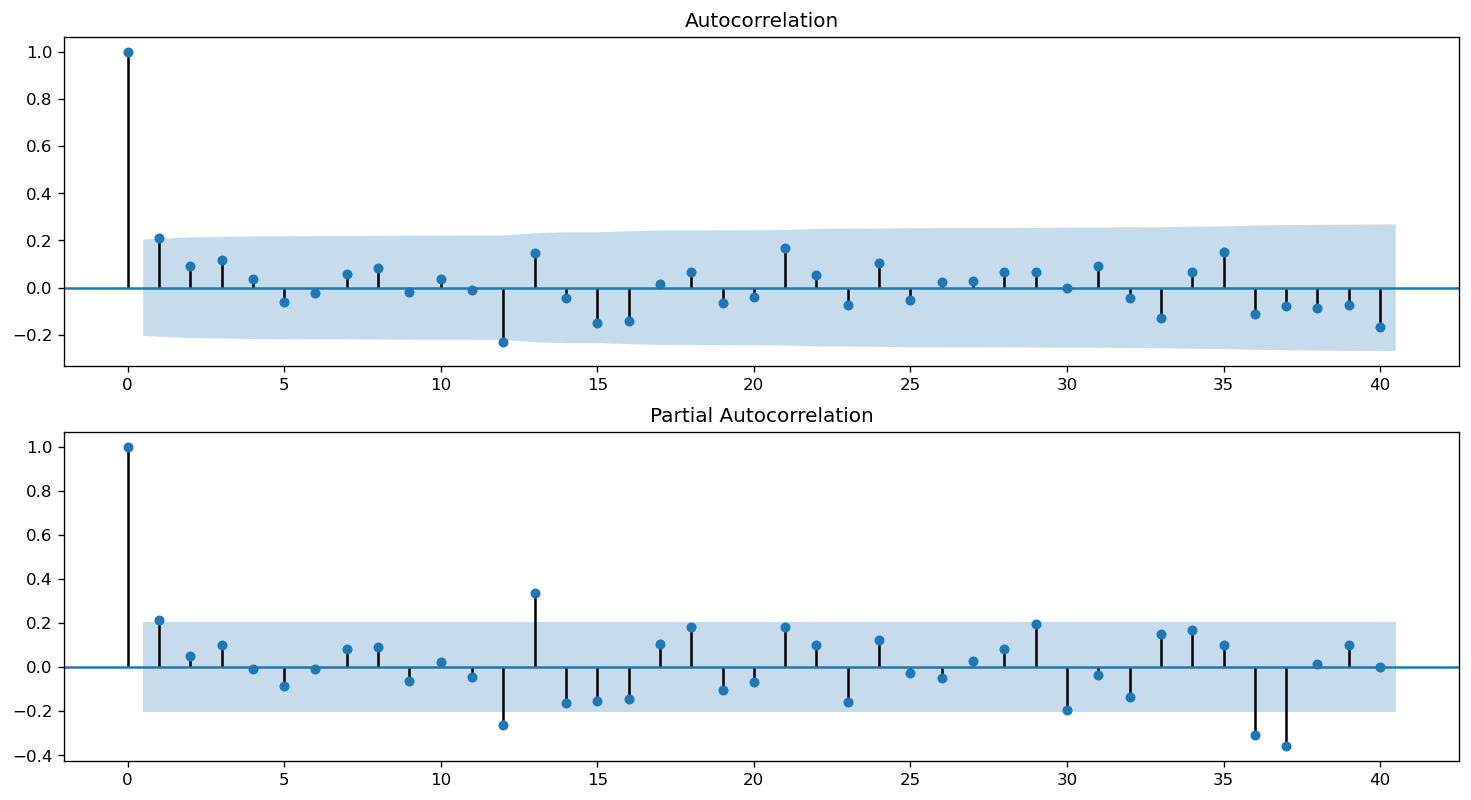

In [30]:
fig =plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal Sales Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal Sales Difference'].iloc[13:],lags= 40,ax=ax2)

In [31]:
import itertools
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [32]:
mod = sm.tsa.statespace.SARIMAX(df['Perrin Freres monthly champagne sales millions ’64-’72'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

c:\users\suraj gupta\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\suraj gupta\appdata\local\programs\python\python38-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2540      0.085      2.987      0.003       0.087       0.421
ma.L1         -0.9526      0.054    -17.733      0.000      -1.058      -0.847
ar.S.L12      -0.0178      0.272     -0.065      0.948      -0.550       0.514
ma.S.L12      -0.2577      0.259     -0.994      0.320      -0.766       0.250
sigma2      5.647e+05    7.3e+04      7.731      0.000    4.22e+05    7.08e+05


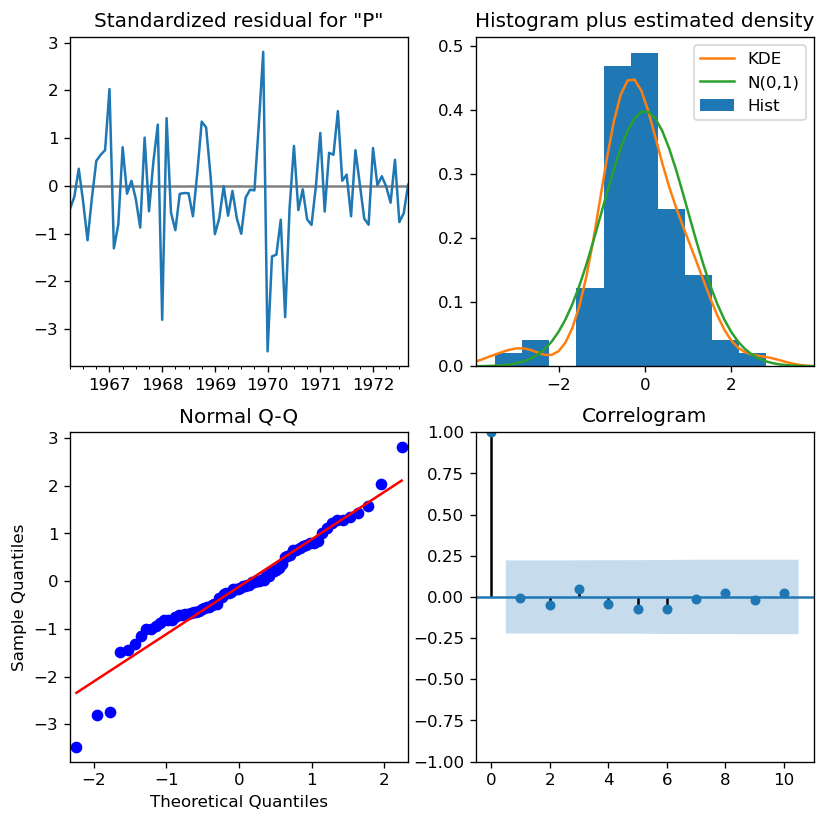

In [41]:
results.plot_diagnostics(figsize=(8, 8))
plt.show()

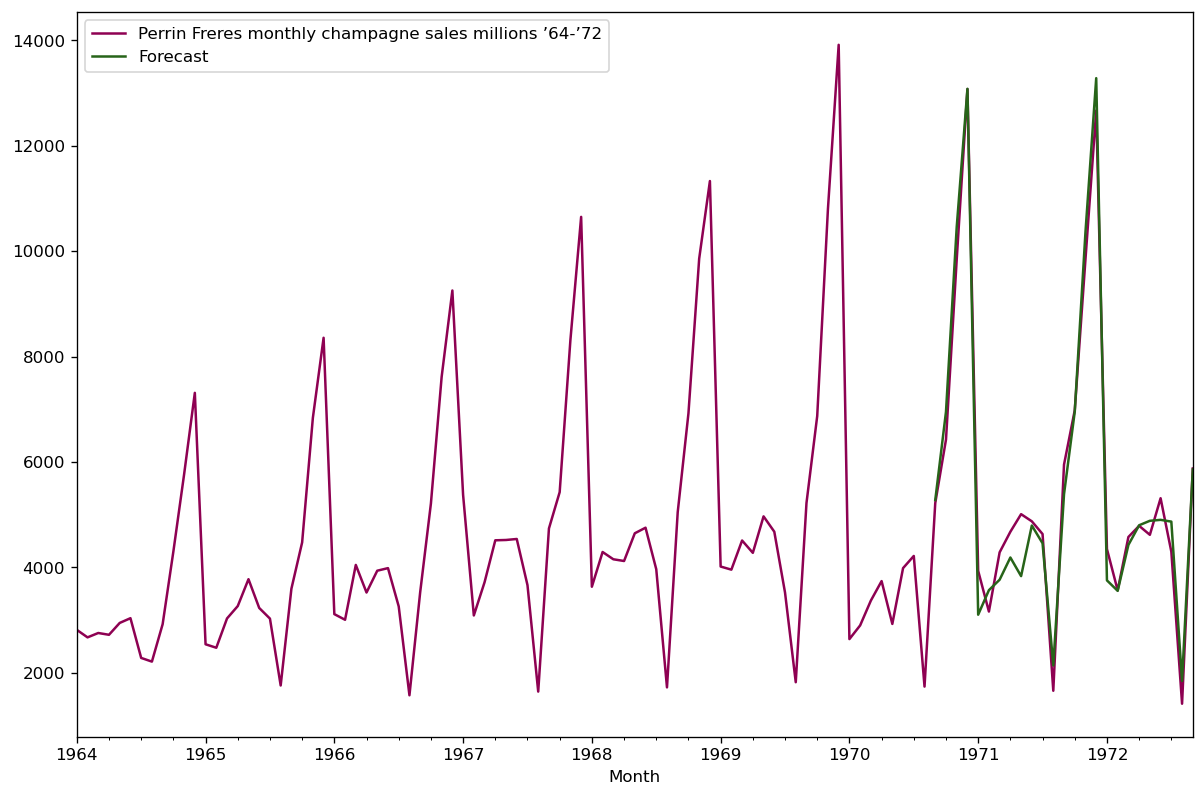

In [44]:
df['Forecast']=results.predict(start=80,end=104,dynamic=False)
df[['Perrin Freres monthly champagne sales millions ’64-’72','Forecast']].plot(figsize=(12,8),cmap='PiYG')

In [45]:
from pandas.tseries.offsets import DateOffset

In [46]:
future_dates = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]
future_df = pd.DataFrame(index=future_dates[1:],columns=df.columns)
future_df.head(10)

,Perrin Freres monthly champagne sales millions ’64-’72,Seasonal Sales Difference,Forecast
1972-10-01,NaN,NaN,NaN
1972-11-01,NaN,NaN,NaN
1972-12-01,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN
1973-02-01,NaN,NaN,NaN
1973-03-01,NaN,NaN,NaN
1973-04-01,NaN,NaN,NaN
1973-05-01,NaN,NaN,NaN
1973-06-01,NaN,NaN,NaN
1973-07-01,NaN,NaN,NaN


In [47]:
future_df.shape

(23, 3)

In [48]:
final_df = pd.concat([df,future_df])

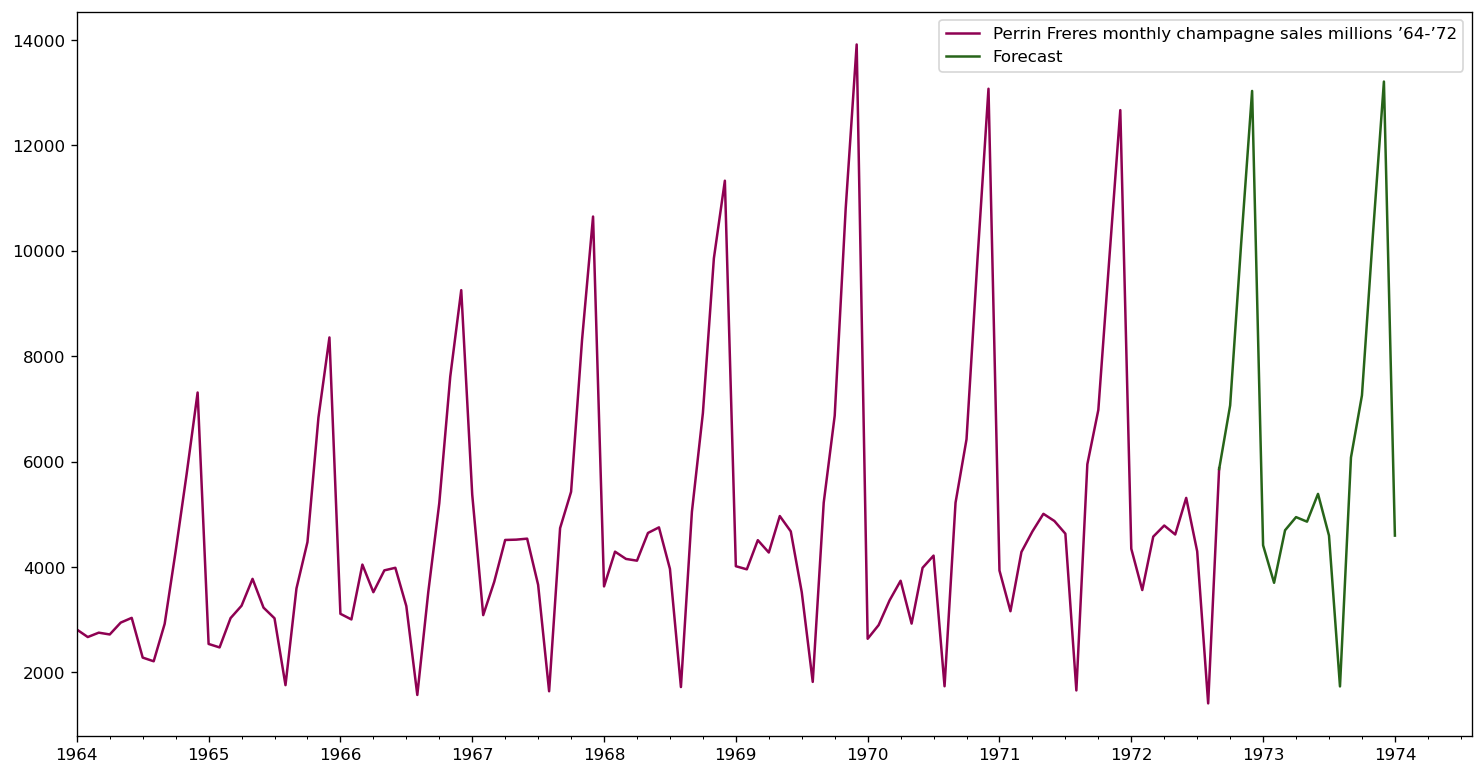

In [51]:
final_df['Forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
final_df[['Perrin Freres monthly champagne sales millions ’64-’72', 'Forecast']].plot(figsize=(15, 8),cmap='PiYG')

In [52]:
final_df.to_excel("Timeseries.xlsx",sheet_name="sheet1")